# Лабораторная работа № 3. Алгоритмы разложения матриц. PCA.

In [ ]:
import pandas as pd
import numpy as np
from numpy import array, identity, diagonal
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

Задание 1. Реализуйте сингулярное матричные разложения (не используя готовые решения вроде numpy.linalg.svd, или numpy.linalg.eig для поиска собственных векторов и чисел).

### Метод Якоби для собственных чисел и векторов

In [ ]:
def jacobi(a,tol = 1.0e-9): 

    def maxElem(a): 
        n = len(a)
        aMax = 0.0
        for i in range(n-1):
            for j in range(i+1,n):
                if abs(a[i,j]) >= aMax:
                    aMax = abs(a[i,j])
                    k = i; l = j
        return aMax,k,l

    def rotate(a,p,k,l):
        n = len(a)
        aDiff = a[l,l] - a[k,k]
        if abs(a[k,l]) < abs(aDiff)*1.0e-36: t = a[k,l]/aDiff
        else:
            phi = aDiff/(2.0*a[k,l])
            t = 1.0/(abs(phi) + sqrt(phi**2 + 1.0))
            if phi < 0.0: t = -t
        c = 1.0/sqrt(t**2 + 1.0); s = t*c
        tau = s/(1.0 + c)
        temp = a[k,l]
        a[k,l] = 0.0
        a[k,k] = a[k,k] - t*temp
        a[l,l] = a[l,l] + t*temp
        for i in range(k):      
            temp = a[i,k]
            a[i,k] = temp - s*(a[i,l] + tau*temp)
            a[i,l] = a[i,l] + s*(temp - tau*a[i,l])
        for i in range(k+1,l):  
            temp = a[k,i]
            a[k,i] = temp - s*(a[i,l] + tau*a[k,i])
            a[i,l] = a[i,l] + s*(temp - tau*a[i,l])
        for i in range(l+1,n):  
            temp = a[k,i]
            a[k,i] = temp - s*(a[l,i] + tau*temp)
            a[l,i] = a[l,i] + s*(temp - tau*a[l,i])
        for i in range(n):      
            temp = p[i,k]
            p[i,k] = temp - s*(p[i,l] + tau*p[i,k])
            p[i,l] = p[i,l] + s*(temp - tau*p[i,l])
        
    n = len(a)
    maxRot = 5*(n**2)      
    p = identity(n)*1.0    
    for i in range(maxRot): 
        aMax,k,l = maxElem(a)
        if aMax < tol: return diagonal(a),p
        rotate(a,p,k,l)
    print('Метод Якоби не сходится')


### Алгоритм SVD

In [ ]:
def svd(data):
  X = data.to_numpy()
  XT = X.transpose()
  XXT = X.dot(XT)
  eigenvalues, U = jacobi(XXT)

  XTX = XT.dot(X)
  eigenvalues_xtx, VT = jacobi(XTX)

  sigmas = np.array([abs(i)**0.5 for i in eigenvalues_xtx])

  return U, sigmas, VT.transpose()

In [ ]:
def explained_variance(eigenvalues):

  explained_variance = []

  for eigenvalue in eigenvalues:
    explained_variance.append(eigenvalue/sum(eigenvalues))

  return explained_variance

Задание 2. Выберите произвольный многомерный массив данных, содержащий минимум 5 признаков.

71_36.csv - набор синтетических данных, 60 объектов с 10ю признаками

In [ ]:
data = pd.read_csv('drive/MyDrive/71_36.csv', header = None) 

In [ ]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9
0,-10.440728,9.220097,-20.707729,6.607158,-19.529615,21.251484,-12.956049,20.434342,12.687891,-1.439507
1,12.155823,8.858985,-17.071138,-23.823867,19.192672,3.017127,-17.780054,4.750363,-12.049571,27.656253
2,-8.579324,10.500568,-17.501436,5.760518,-20.956348,20.403692,-14.099575,23.691759,13.266730,-4.389464
3,-15.446555,-4.035479,15.207785,-13.285472,24.687674,10.801007,9.490218,23.362035,18.498444,-11.775716
4,-18.740831,-6.687865,14.312007,-15.941405,20.368070,16.717548,11.622035,23.113337,16.466612,-13.347755
5,-12.855656,-5.753353,2.410525,-9.730559,16.719181,19.687078,-22.542732,-7.995538,-4.526992,6.564124
6,-9.009127,9.642805,-17.002588,6.935935,-18.422287,21.500128,-13.470410,25.547230,14.490897,-3.810050
7,-17.856777,-11.955599,19.404304,-11.891756,21.273528,-10.668466,-12.805453,-16.549398,-17.655751,2.231707
8,-6.553725,8.742231,-19.248883,4.152296,-17.522486,20.135562,-9.027608,21.162583,12.241814,-3.317396
9,-15.720744,-5.529684,18.644411,-15.417111,22.741212,12.109447,12.064258,24.749182,17.363932,-13.869324


In [ ]:
data.shape

(60, 10)

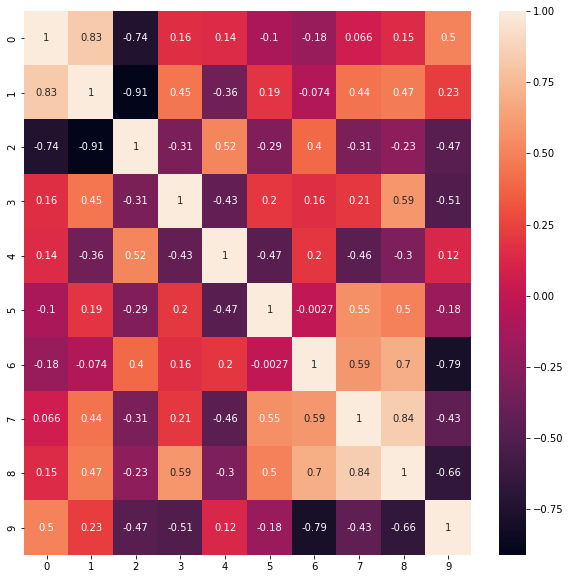

In [ ]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(data.corr(), annot = True)

Задание 3. Используйте написанный метод сингулярного разложения для получения матрицы преобразований данных к главным компонентам и значения объясняемых
дисперсий. Опишите ограничения применимости реализаций SVD к решению
данной задачи.

In [ ]:
u, s, v = svd(data)

In [ ]:
print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape:{v.shape}')

u.shape:(60, 60),s.shape:(10,),v.shape:(10, 10)


In [ ]:
u

array([[ 8.76084681e-01, -1.13042459e-02,  2.01964251e-03, ...,
        -1.44934019e-02, -2.04606667e-01,  4.54989922e-03],
       [-4.12428771e-02,  7.27826970e-01, -1.91011957e-02, ...,
        -2.20060961e-02,  7.23385834e-02, -7.27467442e-02],
       [-8.33311398e-02,  6.23715261e-03,  8.42414503e-01, ...,
         1.42987224e-03, -2.01017892e-01, -3.37657188e-02],
       ...,
       [ 2.26601831e-02,  1.48621670e-01,  4.29573295e-04, ...,
         6.65894120e-01,  1.97408465e-01,  4.44203231e-02],
       [ 1.16206025e-02, -1.50433836e-01, -3.08445249e-02, ...,
        -2.29862813e-01,  2.20994858e-01, -9.43169880e-02],
       [-6.01679418e-02, -4.30710223e-02, -9.76399702e-03, ...,
        -6.18986684e-02, -1.02584137e-01,  7.49315025e-01]])

In [ ]:
s

array([ 11.67067082,   9.15564907, 179.49971552,  83.25071942,
       212.14020591,  47.82784665, 120.71890569, 170.75587254,
        12.40150701,  11.0829225 ])

In [ ]:
v

array([[ 0.36275088, -0.19065207,  0.53167017,  0.06014635, -0.17234343,
        -0.17261219, -0.51029613,  0.22060459,  0.3566239 ,  0.22366598],
       [-0.24123015,  0.70795272,  0.36378133, -0.12777065, -0.13746775,
         0.06625248,  0.12870584, -0.30538289,  0.24424692,  0.31493099],
       [-0.2629237 , -0.32640234,  0.56304282,  0.17423378, -0.13371139,
        -0.25571872,  0.47980496, -0.11432886,  0.0352642 , -0.38621207],
       [-0.06646761,  0.07320015,  0.00524965,  0.66486932,  0.28325634,
         0.23350724, -0.36141246, -0.43184905,  0.15519101, -0.26867901],
       [-0.20632855, -0.22519027,  0.3041087 , -0.39129681,  0.52063573,
        -0.08323019, -0.28099916, -0.33225857, -0.39932016,  0.18525893],
       [ 0.41748361, -0.29481465,  0.15920105, -0.03729948, -0.05190534,
         0.68829955,  0.33459822, -0.2617306 , -0.01166837,  0.23454226],
       [ 0.51476748,  0.20077353,  0.01198728,  0.027732  ,  0.63057929,
        -0.34049889,  0.36182984,  0.01467861

Далее возьмем два собственных вектора соответствующие двум наибольшим сингулярным числам и построим матрицу проекции W для получения нового подпространства.

In [ ]:
w = np.hstack((v[4][:, np.newaxis], v[2][:, np.newaxis]))

In [ ]:
w

array([[-0.20632855, -0.2629237 ],
       [-0.22519027, -0.32640234],
       [ 0.3041087 ,  0.56304282],
       [-0.39129681,  0.17423378],
       [ 0.52063573, -0.13371139],
       [-0.08323019, -0.25571872],
       [-0.28099916,  0.47980496],
       [-0.33225857, -0.11432886],
       [-0.39932016,  0.0352642 ],
       [ 0.18525893, -0.38621207]])

При помощи матрицы W трансформируем исодный набор данных.

In [ ]:
new_dim = data.dot(w).rename(columns={0:'pc_1', 1:'pc_2'})

In [ ]:
new_dim.head(5)

,pc_1,pc_2
0,-29.223455,-21.144792
1,22.721981,-43.368325
2,-30.800386,-19.748180
3,5.876176,12.646024
4,5.182351,14.062187


Ограничения:
 - Метод Якоби применим только к симметричным и квадратным матрицам

Задание 4. Определите достаточное число компонент для описания процесса, визуализируйте данные и проведите анализ полученных компонент.

In [ ]:
var = explained_variance(sorted(s, reverse = True))

In [ ]:
var

[0.24710450058182656,
 0.2090843051984583,
 0.1988993289863991,
 0.1406154235283831,
 0.09697184631229218,
 0.05571068487806881,
 0.014445485165014961,
 0.013594194803733237,
 0.012909575619395387,
 0.010664654926428405]

Text(0, 0.5, 'Variance')

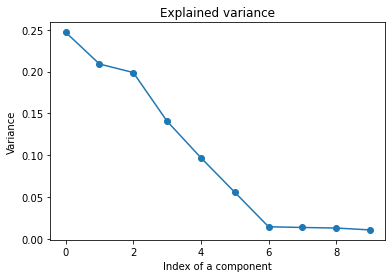

In [ ]:
plt.plot(var, marker = 'o')
plt.title('Explained variance')
plt.xlabel('Index of a component')
plt.ylabel('Variance')

Для описания 80% данных потребуется 4 компоненты

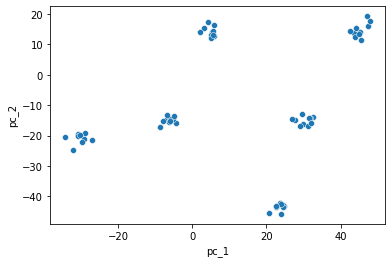

In [ ]:
sns.scatterplot(data=new_dim, x="pc_1", y="pc_2")

После трансформации исходных данных, получили 6 четко разделимих кластеров

Сравним полученные результаты с PCA из sklearn

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
components = pca.fit_transform(data)

fig = px.scatter(components, x=0, y=1)
fig.show()

In [ ]:
pca.singular_values_

array([205.57240797, 176.60791929])

In [ ]:
pca.components_

array([[ 0.16432134,  0.29390163, -0.38855345,  0.27562025, -0.350775  ,
         0.25804902,  0.1294067 ,  0.466406  ,  0.46416618, -0.14253681],
       [-0.39477179, -0.25543029,  0.52474445,  0.04952985,  0.07561264,
         0.05632662,  0.40118906,  0.21188902,  0.27064683, -0.46163988]])

Готовый PCA также разделил данные на 6 кластеров. Сингулярные числа и вектора примерно похожи на те, которые были получены выше.